# Рынок заведений общественного питания Москвы

## Общее описание проекта
По открытым данным о заведениях общественного питания в Москве требуется провести исследование рынка.

## Описание располагаемых данных

Данные о заведениях общественного питания Москвы содержатся в файле `project3`. Каждая запись характеризуется следующим набором признаков:

|Признак|Описание|
|------:|:-------|
|`id` | идентификатор объекта|
|`object_name` | название объекта общественного питания|
|`chain` | сетевой ресторан|
|`object_type` | тип объекта общественного питания|
|`address` | адрес|
|`number` |  количество посадочных мест|

## Загружаем необходимые библиотеки для данной работы

In [197]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

## Прочитаем данные

In [127]:
df = pd.read_csv('project3.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


#### Данные загружены корректно

## Знакомство с данными

In [128]:
print('Количество строк -- {}, количество колонок -- {}'.
     format(df.shape[0], df.shape[1]))

(15366, 6)

In [129]:
print('Количество дублирующихся записей -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.duplicated().sum(), df.duplicated().sum()/df.shape[0]))

Количество дублирующихся записей -- 0. Это составляет -- 0.00% от общего числа записей.


In [130]:
print('Количество дублирующихся записей без идентификатора -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.drop('id', axis=1).duplicated().sum(), 
             df.drop('id', axis=1).duplicated().sum()/df.drop('id', axis=1).shape[0]))

Количество дублирующихся записей без идентификатора -- 82. Это составляет -- 0.53% от общего числа записей.


#### Сделаем поправку - удалим дублирующие записи без идентификатора

In [131]:
index_del = df.loc[df.drop(columns='id').duplicated()].index

In [132]:
df.drop(index = index_del, inplace = True)

In [133]:
print('Количество дублирующихся записей без идентификатора -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.drop('id', axis=1).duplicated().sum(), 
             df.drop('id', axis=1).duplicated().sum()/df.drop('id', axis=1).shape[0]))

Количество дублирующихся записей без идентификатора -- 0. Это составляет -- 0.00% от общего числа записей.


In [134]:
df.describe()

,id,number
count,15284.000000,15284.000000
mean,119506.877126,59.784350
std,73042.951997,74.838657
min,838.000000,0.000000
25%,28494.500000,14.000000
50%,144805.500000,40.000000
75%,184123.000000,80.000000
max,223439.000000,1700.000000


In [135]:
df.describe(include=[object])

,object_name,chain,object_type,address
count,15284,15284,15284,15284
unique,10393,2,9,9108
top,Столовая,нет,кафе,"город Москва, Ходынский бульвар, дом 4"
freq,267,12320,6071,95


#### По описательным статистикам видим:

- кафе (тип заведения) лидирует по количеству других типов из всей выборки;
- в выборке несетевых заведений больше, чем сетевых;
- количество посадочных мест варьируется от 0 - 1700

In [198]:
for col in df.select_dtypes('object').columns:
    print('---{}---'.format(col))
    print(df[col].unique())
    print('------')

---object_name---
['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»']
------
---chain---
['нет' 'да']
------
---object_type---
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']
------
---address---
['город Москва, улица Егора Абакумова, дом 9'
 'город Москва, улица Талалихина, дом 2/1, корпус 1'
 'город Москва, Абельмановская улица, дом 6' ...
 'город Москва, Салтыковская улица, дом 7Г'
 'город Москва, Осенний бульвар, дом 9'
 'город Москва, улица Новый Арбат, дом 13']
------


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.8+ KB


In [200]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

#### Пропусков в данных нет

## Анализ данных

Для подписей на графиках применю функцию перевода заголовков на русский язык (для удобства восприятия визуализации русскоговорящим)

In [201]:
dict_to_rus = {
'object_name':'название объекта общественного питания',
'chain':'сетевой ресторан',
'object_type': 'тип объекта общественного питания',
'address':'адрес',
'number': 'количество посадочных мест'
} 

In [202]:
category_ = ['chain', 'object_type']

### Посмотрим на распределение видов объектов общественного питания по количеству

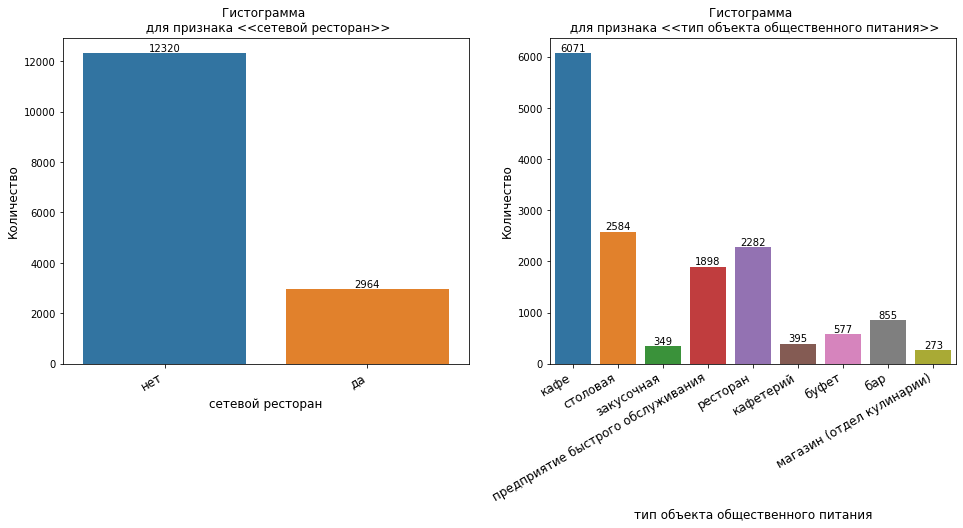

In [204]:
fig, axes = plt.subplots(2, sharey=True, figsize=(16,6))
i=0
for i, col in enumerate(category_):
    plt.subplot(1,2,i+1)
    ax = sns.countplot(x=col, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30,  ha="right", fontsize=12)
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

### Распределение видов объекта общепита в сетевом сегменте

In [142]:
count_type_of_chain_yes = df[df['chain'] == 'да'].groupby('object_type', as_index=False).\
agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
count_type_of_chain_yes.columns = ['object_type', 'count_yes']
count_type_of_chain_yes

,object_type,count_yes
3,кафе,1396
6,предприятие быстрого обслуживания,788
7,ресторан,543
5,магазин (отдел кулинарии),78
2,закусочная,56
4,кафетерий,52
0,бар,37
1,буфет,11
8,столовая,3


In [143]:
count_type_of_chain_no = df[df['chain'] == 'нет'].groupby('object_type', as_index=False).\
agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
count_type_of_chain_no.columns = ['object_type', 'count__no']
count_type_of_chain_no

,object_type,count__no
3,кафе,4675
8,столовая,2581
7,ресторан,1739
6,предприятие быстрого обслуживания,1110
0,бар,818
1,буфет,566
4,кафетерий,343
2,закусочная,293
5,магазин (отдел кулинарии),195


#### По произведенному анализу видно, что больше всего во всей выборке - кафе не сетевого типа

### Проанализируем заведения по количеству посадочных мест

In [206]:
count_number = df['number'].value_counts()
count_number.head()

0     1589
40     832
20     724
30     681
10     638
Name: number, dtype: int64

#### Почистим наши данные от количества посадочных мест = 0

In [207]:
df_clean = df[(df['number'] > 0)]

In [208]:
count_number = df_clean['number'].value_counts()
count_number.head()

40    832
20    724
30    681
10    638
50    554
Name: number, dtype: int64

### Посмотрим на популярное количество посадочных мест

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


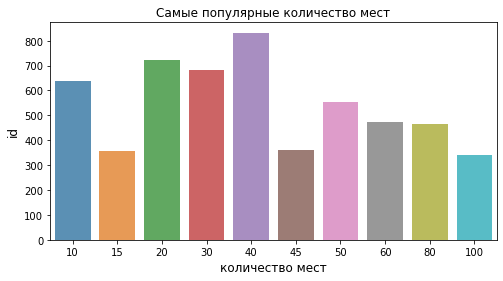

In [209]:
x=df_clean.groupby(['number']).count()
x=x.sort_values(by='id',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.number, x.id, alpha=0.8)
plt.title("Самые популярные количество мест")
plt.ylabel('id', fontsize=12)
plt.xlabel('количество мест', fontsize=12)
plt.show();

#### Можем заметить, что основная масса заведений из нашей выборки с небольшим количеством посадочных мест

<AxesSubplot:>

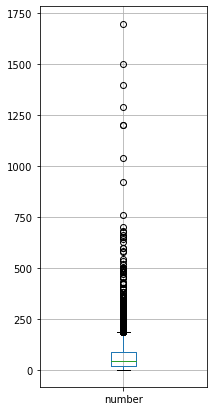

In [210]:
df_clean.boxplot(column='number', figsize=(3, 7))

#### Не считаю за выбросы заведения от 1000 до 2000 посадочных мест. Их в нашей выборке не много и такие заведения на самом деле существуют и к тому же нам не известна информация на какое количество посадочных мест ориентируется заказчик. 

Также посмотрим на заведения в которых количество посадочных мест превышает 1000 

In [211]:
df_clean[df_clean['number'] > 1000]

,id,object_name,chain,object_type,address,number
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700


In [212]:
df_clean.shape

(13695, 6)

### На данном этапе вынесем отдельно улицы из адреса

In [213]:
type_street = ['улица', 'переулок', 'шоссе', 'площадь', 'бульвар', 'проезд', 'тупик', 'просек',   
               'проспект', 'набережная', 'аллея', 'квартал', 'линия', 'микрорайон', 'город Зеленоград', 'город зеленоград']

In [214]:
def split_street(s):
    for street in type_street:
        if s.lower().find(street) !=-1:
            flag = True
            break
        else: flag = False
    return flag

In [215]:
df_clean[~df_clean['address'].apply(split_street)] 

,id,object_name,chain,object_type,address,number
1853,77651,Щербенко Л.А.,нет,кафе,"город Москва, поселение Вороновское, село Вороново, дом 110",50
1859,120302,Магбургер АЗС №16,да,предприятие быстрого обслуживания,"город Москва, поселение Внуковское, деревня Ликова, дом 1А",25
1861,77870,Кафе,нет,кафе,"город Москва, поселение Десеновское, деревня Десна, дом 144УЧ",15
1874,79716,Шоколадница,да,кафе,"город Москва, поселение Московский, деревня Говорово, дом 1Б/Н",45
1875,99687,Крошка Картошка,да,предприятие быстрого обслуживания,"город Москва, поселение Московский, деревня Говорово, дом 1Б/Н",40
...,...,...,...,...,...,...
14979,213734,Кафе,нет,кафе,"город Москва, поселение Воскресенское, деревня Ямонтово, владение 71",8
14981,216909,Кафе,нет,буфет,"город Москва, поселение Десеновское, деревня Ватутинки, дом 34",10
14997,216942,Шашлычный дворик,нет,кафе,"город Москва, поселение Десеновское, деревня Ватутинки, владение 10",15
14998,216926,Кафе «Сахли»,нет,закусочная,"город Москва, поселение Десеновское, деревня Ватутинки, владение 15",10


Оставим в нашей выборке только те адреса, в которых большая населенность

In [216]:
df_clean.drop(df_clean[~df_clean['address'].apply(split_street)].index, inplace = True)
df_clean = df_clean.reset_index(drop=True)
df_clean 

C:\Users\User\AppData\Local\Temp\ipykernel_5788\1157677768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(df_clean[~df_clean['address'].apply(split_street)].index, inplace = True)


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
13519,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
13520,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
13521,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
13522,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


### Теперь, получив полный список типов улиц, встречающихся в адресах, выделим в отдельный столбец их названия. Для этого:

- разобъем каждый адрес методом `.split()` по символу `, `;
- для каждого из выявленных типов проверим его вхождение в каждый элемент разбиения. Если тип улицы содержится в элементе разбиения, то этот элемент разбиения является улицей. 

In [217]:
def find_street(address):
    for address_split in address.split(', '):
        for st_type in type_street:
            if address_split.lower().find(st_type) != -1:
                return address_split

In [218]:
df_clean['street'] = df_clean['address'].apply(find_street)
df_clean

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
13519,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
13520,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
13521,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
13522,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,Киевское шоссе


## Топ-20 улиц по количеству объектов общественного питания

In [219]:
top_streets = df_clean.groupby('street', as_index=False).agg({'object_name':'count'})
top_streets.columns = ['street', 'count_objects_name']
top_streets = top_streets.sort_values(by='count_objects_name', ascending = False)
top20_streets = top_streets.head(20)
print('Топ-20 улиц по количеству заведений:\n', top20_streets)

Топ-20 улиц по количеству заведений:
                        street  count_objects_name
1342         город Зеленоград                 225
1393            проспект Мира                 192
678    Ленинградский проспект                 159
983    Пресненская набережная                 156
399          Варшавское шоссе                 144
997         Профсоюзная улица                 143
681        Ленинский проспект                 138
1390     проспект Вернадского                 126
668      Кутузовский проспект                  98
593           Каширское шоссе                  96
491         Дмитровское шоссе                  93
679       Ленинградское шоссе                  90
599      Кировоградская улица                  85
1623  улица Ленинская Слобода                  84
1008          Пятницкая улица                  80
1810      улица Сущёвский Вал                  79
1556       улица Земляной Вал                  78
1732           улица Покровка                  76
1675     ули

#### И выведем информацию по улицам на которых наименьшее количество заведений. Это на случай понимания в каком месте открывать новое заведение (не в загруженных местах и достаточно населенных) (Москва)

In [220]:
bottom_streets = df_clean.groupby('street', as_index=False).agg({'object_name':'count'})
bottom_streets.columns = ['street', 'count_objects_name']
bottom_streets = bottom_streets.sort_values(by='count_objects_name', ascending = False)
bottom20_streets = bottom_streets.tail(20)
print('20 улиц по наименьшему количеству заведений:\n', bottom20_streets)

20 улиц по наименьшему количеству заведений:
                         street  count_objects_name
868   Новопресненский переулок                   1
1332          аллея Жемчуговой                   1
496          Докучаев переулок                   1
494      Добровольческая улица                   1
489       Дмитровский переулок                   1
488          Дивизионная улица                   1
1313          Юрловский проезд                   1
487          Джанкойская улица                   1
1317       Якиманский переулок                   1
1319           Ялтинская улица                   1
1320           Янтарный проезд                   1
483          Денежный переулок                   1
481          Делегатская улица                   1
867       Новопоселковая улица                   1
1325               Ясная улица                   1
1326         Ясногорская улица                   1
479         Дегтярный переулок                   1
1329           Яузский бульвар      

In [221]:
streets_one_object = top_streets[top_streets['count_objects_name'] == 1]
print('На {} улицах расположено по одному объекту общественного питания.'.\
      format(streets_one_object.shape[0]))
print('Это {:.2%} процентов от общего количества улиц с объектами общепита.'.\
      format(streets_one_object.shape[0]/top_streets.shape[0]))

На 566 улицах расположено по одному объекту общественного питания.
Это 30.40% процентов от общего количества улиц с объектами общепита.


In [222]:
print('На улицах из топ-20 расположено {} объектов общепита'.\
      format(top20_streets.count_objects_name.sum()))

print('Это составляет {:.2%} процентов от общего количества объектов общепита.'.\
      format(top20_streets.count_objects_name.sum()/df_clean.shape[0]))

На улицах из топ-20 расположено 2290 объектов общепита
Это составляет 16.93% процентов от общего количества объектов общепита.


In [223]:
object_from_top_20_street = df_clean[df_clean['street'].isin(top20_streets.street.to_list())]
object_from_top_20_street.head()

,id,object_name,chain,object_type,address,number,street
36,127979,Месопотамия,нет,ресторан,"город Москва, улица Арбат, дом 4, строение 1",50,улица Арбат
37,24968,Му-Му,да,кафе,"город Москва, улица Арбат, дом 4, строение 1",125,улица Арбат
38,127980,Хлеб насущный,да,кафе,"город Москва, улица Арбат, дом 6/2",20,улица Арбат
39,88194,TAJJ MAHAL,да,ресторан,"город Москва, улица Арбат, дом 6/2",100,улица Арбат
40,107496,Калифорния Дайнер,нет,кафе,"город Москва, улица Арбат, дом 23, строение 1",150,улица Арбат


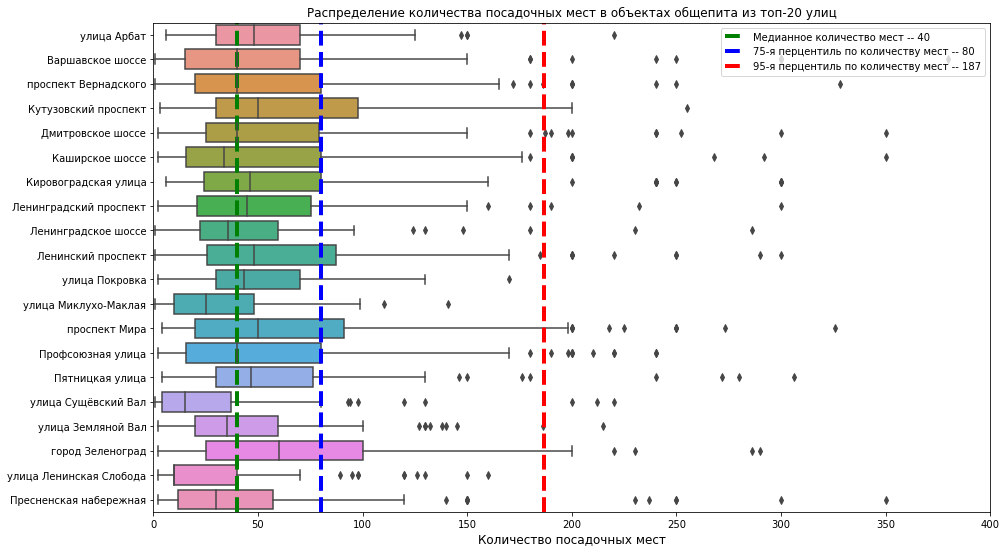

In [224]:
plt.figure(figsize=(15,9))
sns.boxplot(data=object_from_top_20_street[object_from_top_20_street['number']>0], x='number', 
            y='street')
plt.xlim(0,400)
plt.title('Распределение количества посадочных мест в объектах общепита из топ-20 улиц', fontsize=12)
plt.ylabel('')
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.axvline(np.median(object_from_top_20_street['number']), linestyle='--', color='green', 
           linewidth = 4, 
           label = 'Медианное количество мест -- {:.0f}'.\
            format(np.median(object_from_top_20_street['number']).round()))
plt.axvline(np.percentile(object_from_top_20_street['number'], 75), linestyle='--', color='blue', 
           linewidth = 4, 
           label = '75-я перцентиль по количеству мест -- {:.0f}'.\
            format(np.percentile(object_from_top_20_street['number'], 75).round()))
plt.axvline(np.percentile(object_from_top_20_street['number'], 95), linestyle='--', color='red', 
           linewidth = 4, 
           label = '95-я перцентиль по количеству мест -- {:.0f}'.\
            format(np.percentile(object_from_top_20_street['number'], 95).round()))
plt.legend(loc = 'upper right')
plt.show()

Как видим, 40 посадочных мест - самое оптимальное количество для заведения

### Для полноты картины построим распределение типов объектов общепита, расположенных на улицах из топ-20

In [225]:
count_object_type = object_from_top_20_street.groupby('object_type', as_index=False).\
agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
count_object_type['percent'] = (count_object_type['object_name'] / count_object_type['object_name'].sum()*100).round(1)
count_object_type.columns = ['object_type', 'count_object_type', 'percent']

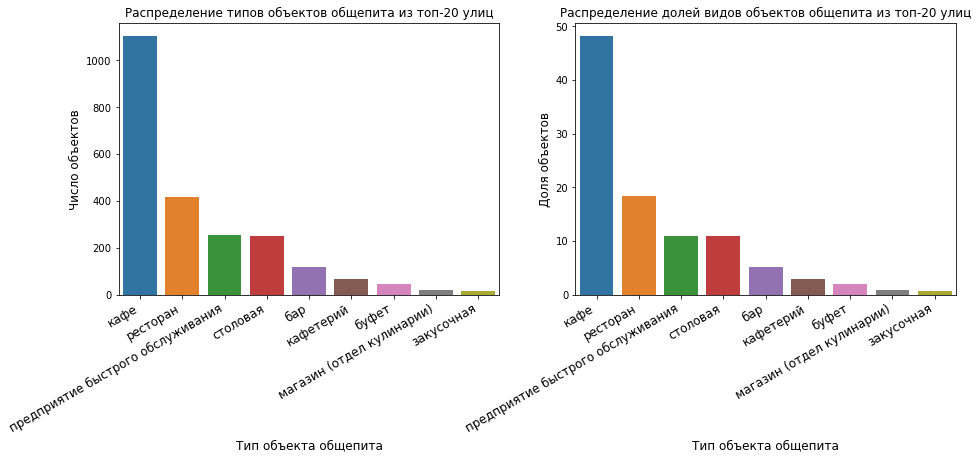

In [226]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
ax=sns.barplot(x = 'object_type', y = 'count_object_type', data =count_object_type)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,  ha="right", fontsize=12)
ax.set_title('Распределение типов объектов общепита из топ-20 улиц', fontsize=12)
plt.xlabel('Тип объекта общепита', fontsize=12)
plt.ylabel('Число объектов', fontsize=12)
plt.subplot(122)
ax=sns.barplot(x = 'object_type', y = 'percent', data =count_object_type)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,  ha="right", fontsize=12)
ax.set_title('Распределение долей видов объектов общепита из топ-20 улиц', fontsize=12)
plt.xlabel('Тип объекта общепита', fontsize=12)
plt.ylabel('Доля объектов', fontsize=12);

#### Кафе - самый распространенный тип заведения на загруженных улицах

### А теперь посмотрим какой тип заведения в основном есть на не загруженных общественным питанием улицах

In [227]:
object_from_bottom_20_street = df_clean[df_clean['street'].isin(bottom20_streets.street.to_list())]
object_from_bottom_20_street.head()

,id,object_name,chain,object_type,address,number,street
1356,87543,Кафе «One Teaspoon»,нет,кафе,"город Москва, Яузский бульвар, дом 14/8",16,Яузский бульвар
1836,27436,ШКОЛА 1381,нет,столовая,"город Москва, Янтарный проезд, дом 2",300,Янтарный проезд
1876,25970,Бюргер,нет,бар,"город Москва, Докучаев переулок, дом 6, строение 2",60,Докучаев переулок
2343,19822,Столовая,нет,столовая,"город Москва, Дивизионная улица, дом 4",80,Дивизионная улица
2473,26686,ТЕРРИТОРИЯ ЯСЕНЕВО,да,ресторан,"город Москва, Ясногорская улица, дом 2",200,Ясногорская улица


In [228]:
count_object_type_bottom = object_from_bottom_20_street.groupby('object_type', as_index=False).\
agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
count_object_type_bottom['percent'] = (count_object_type_bottom['object_name'] / count_object_type_bottom['object_name'].sum()*100).round(1)
count_object_type_bottom.columns = ['object_type', 'count_object_type', 'percent']

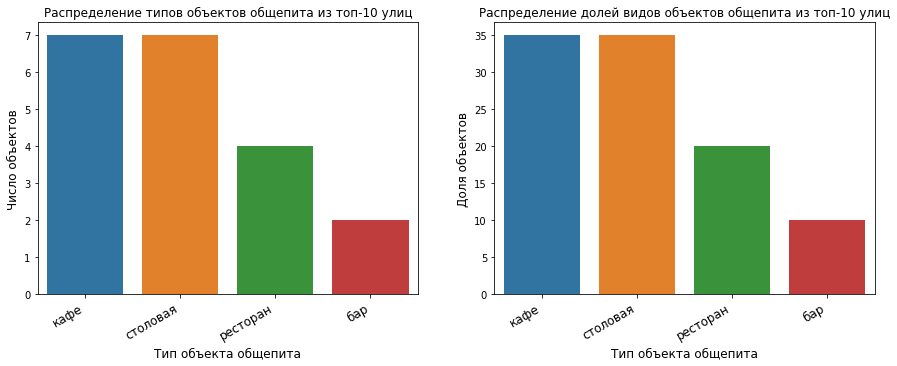

In [229]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
ax=sns.barplot(x = 'object_type', y = 'count_object_type', data =count_object_type_bottom)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,  ha="right", fontsize=12)
ax.set_title('Распределение типов объектов общепита из топ-10 улиц', fontsize=12)
plt.xlabel('Тип объекта общепита', fontsize=12)
plt.ylabel('Число объектов', fontsize=12)
plt.subplot(122)
ax=sns.barplot(x = 'object_type', y = 'percent', data =count_object_type_bottom)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,  ha="right", fontsize=12)
ax.set_title('Распределение долей видов объектов общепита из топ-10 улиц', fontsize=12)
plt.xlabel('Тип объекта общепита', fontsize=12)
plt.ylabel('Доля объектов', fontsize=12);

#### А вот, на улицах, где маленькое количество заведений в основном по типам кафе и столовые

## Проверяем гипотезу о равенстве количества посадочных мест в заведениях сетевого и несетевого типа.

In [230]:
print('Среднее количество посадочных мест заведений сетевого типа= {}'.\
      format(df_clean[df_clean.chain == 'да'].number.mean()))
print('Среднее количество посадочных мест заведений несетевого типа= {}'.\
      format(df_clean[df_clean.chain == 'нет'].number.mean()))

Среднее количество посадочных мест заведений сетевого типа= 58.234328358208955
Среднее количество посадочных мест заведений несетевого типа= 69.06805606787164


In [231]:
list_var = ['number']
alpha = 0.05
equal_var = False

In [232]:
for i in list_var:
  
  results = stats.mannwhitneyu(df_clean[(df_clean.chain == 'да') & (df_clean.number <= 200)].number, 
                               df_clean[(df_clean.chain == 'нет') & (df_clean.number <= 200)].number)
  print('Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:')
  print('Уровень значимости alpha = ', alpha)
  print('P-value: {:.2f}'.format(results.pvalue))
  if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в количестве посадочных мест статистически значима.')
  else:
    print('Не получилось отвергнуть нулевую гипотезу: разница в количестве посадочных мест статистически незначима.')

Результаты проверки гипотезы H_0 по тесту Уилкоксона-Манна-Уитни:
Уровень значимости alpha =  0.05
P-value: 0.80
Не получилось отвергнуть нулевую гипотезу: разница в количестве посадочных мест статистически незначима.
